## Iris Dataset : Logistic Regression

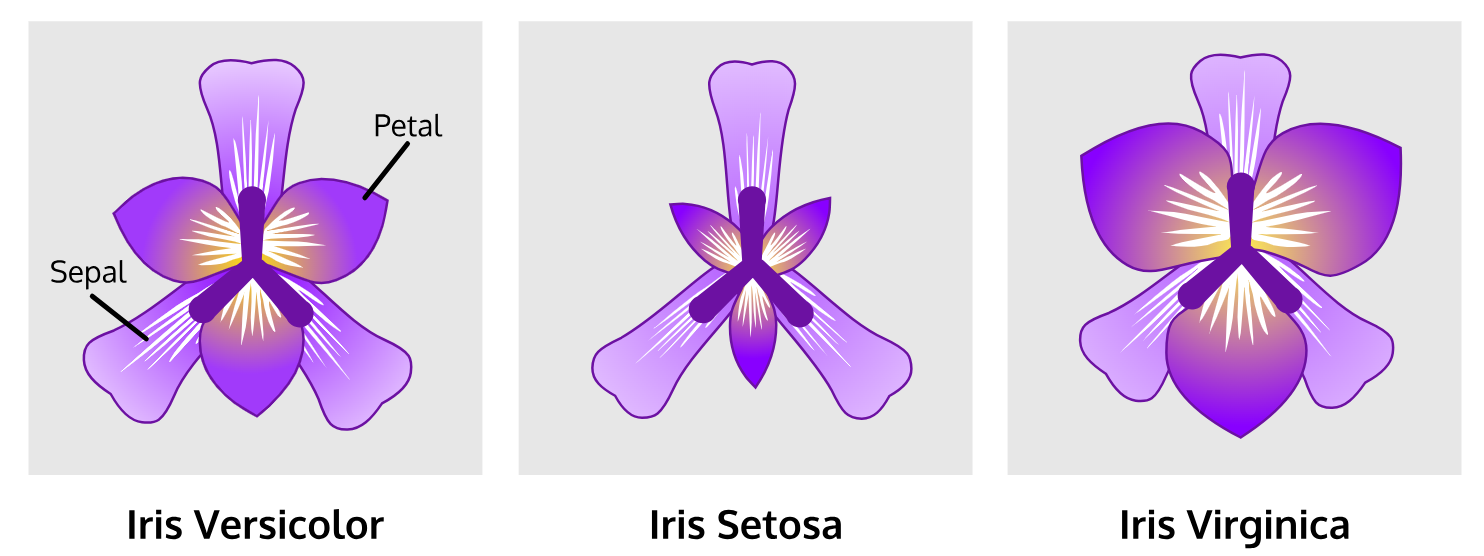

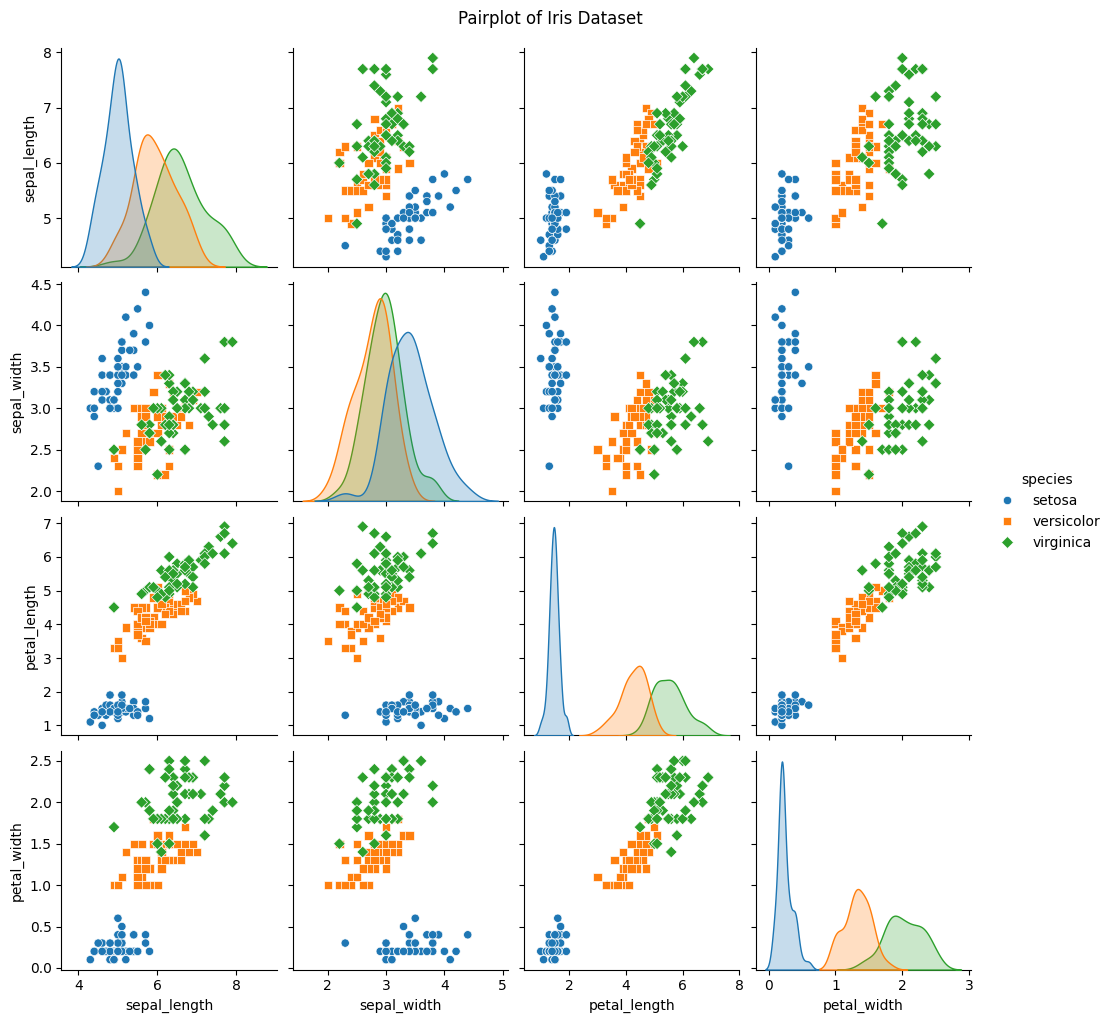

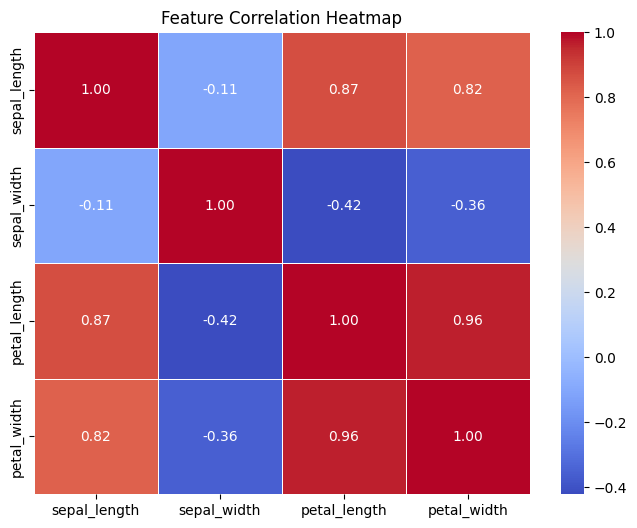

Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.86      0.60      0.71        10
   virginica       0.69      0.90      0.78        10

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30



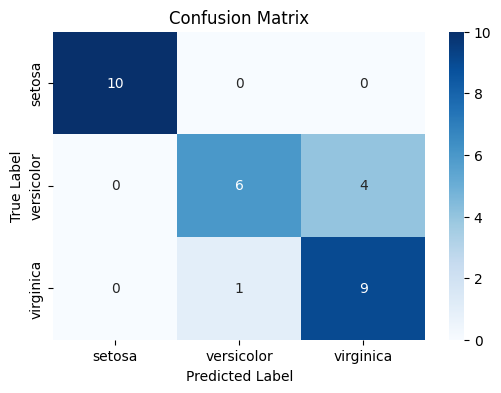

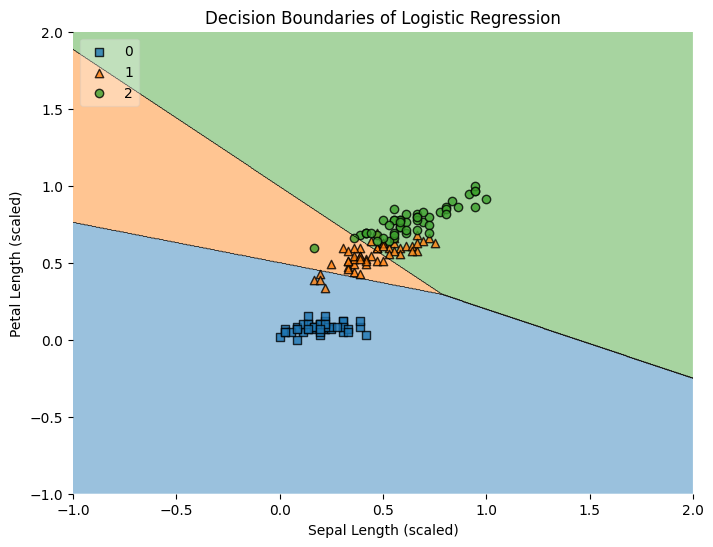

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions
from IPython.display import display
from PIL import Image


# Load dataset
path = r"C:\Users\offic\.cache\kagglehub\datasets\himanshunakrani\iris-dataset\versions\1\iris.csv"
df = pd.read_csv(path)


# Define the image path
image_path = r"C:\Users\offic\Documents\Datasets\iris.png"
# Open and display the image
img = Image.open(image_path)
display(img)


# Pairplot to visualize the dataset
sns.pairplot(df, hue="species", diag_kind="kde", markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Prepare data for Logistic Regression
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train Logistic Regression model
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

# Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Decision Boundaries (Using only two features for visualization)
X_vis = X_scaled[:, [0, 2]]  # Choosing 'sepal_length' and 'petal_length' for plotting

# Train Logistic Regression on two features
model_vis = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
model_vis.fit(X_vis, y_encoded)

# Plot decision regions
plt.figure(figsize=(8, 6))
plot_decision_regions(X_vis, y_encoded, clf=model_vis, legend=2)
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Petal Length (scaled)")
plt.title("Decision Boundaries of Logistic Regression")
plt.show()
